# Convex Hull
#### 2D - QuickHull

In [337]:
# imports

import random
import matplotlib.pyplot as plt
import math
import numpy as np
import convexHull_GrahamScan


In [338]:
# generate random coordinates

def generateCoordinates(x_min : int, y_min : int, x_max : int, y_max : int, n : int) -> list[int]:
    plane : list[int] = [(random.randint(x_min,x_max+1),random.randint(y_min,y_max+1)) for _ in range(n)]
    return plane

In [339]:
def plot_points_and_line(points1, points2):
    x1, y1 = zip(*points1)
    points2.append(points2[0])
    x2, y2 = zip(*points2)
    plt.plot(x2, y2, color='red')
    plt.scatter(x1, y1)
    plt.show()

    
def intermediate_display(s1, s2, left, right, fp):
        # s1 = [tuple(point) for point in s1] if isinstance(s1, np.ndarray) else s1
        # s2 = [tuple(point) for point in s2] if isinstance(s2, np.ndarray) else s2
        if s1:
            x1, y1 = zip(*s1)
            plt.scatter(x1, y1, color='yellow')
        else:
             print('s1 ', s1)
        if s2:
            x2, y2 = zip(*s2)
            plt.scatter(x2, y2, color='purple')
        else:
             print('s2 ', s2)
        # Connect the three coordinates with lines
        plt.plot([left[0], right[0]], [left[1], right[1]], color='blue')
        plt.plot([left[0], fp[0]], [left[1], fp[1]], color='blue')
        plt.plot([right[0], fp[0]], [right[1], fp[1]], color='blue')

        plt.show()
        


In [340]:
def perpendicular_distance(A, B, C):
    x1, y1 = A
    x2, y2 = B
    x3, y3 = C
    
    if x2 - x1 != 0:
        m = (y2 - y1) / (x2 - x1)
    else:
        m = float('inf')
    
    A_line = -m
    B_line = 1
    C_line = -y1 + m * x1
    
    distance = abs(A_line * x3 + B_line * y3 + C_line) / math.sqrt(A_line**2 + B_line**2)
    
    return distance

In [341]:
def cross_product(p, q, r):
        return ((q[1] - p[1]) * (r[0] - q[0])) - ((q[0] - p[0]) * (r[1] - q[1]))


In [342]:
def quickHull(points):
    hull = []
    sortedPoints = sorted(points, key=lambda point: point[0])    
    left = sortedPoints[0]
    right = sortedPoints[-1]
    hull.extend([left, right])

    s1 = [] #left
    s2 = [] #right
    for i in range(1, len(points)-1):
        turn = cross_product(left, points[i], right)
        if turn < 0:
            s1.append(points[i])
        elif turn > 0:
            s2.append(points[i])
        else:
            pass

    
    def findHull(points, left, right):
        if len(points) <= 1:
            return points
        disDict = {(tuple(x)): perpendicular_distance(left, right, x) for x in points}
        sorted_disDict = sorted(disDict.items(), reverse=True, key=lambda item: item[1])

        farthest_point, farthest_distance = sorted_disDict[0]  
        
        fp = farthest_point
        s1 = []
        s2 = []
        for i in range(len(points)):
            turn1 = cross_product(left, points[i], fp)
            turn2 = cross_product(fp, points[i], right)
            if turn1 < 0:
                s1.append(points[i])
            elif turn2 < 0:
                s2.append(points[i])
            else:
                pass
            
        # intermediate_display(s1,s2, left, right, fp)
        hull = [fp]
        hull.extend(findHull(s1, left, fp))
        hull.extend(findHull(s2, fp, right))
        return hull

    hull.extend(findHull(s1, left, right))
    hull.extend(findHull(s2, left, right))
    return hull

In [343]:
def sortByAngle(p):
    start = p[0]
    sortedByAngle = sorted(p, key=lambda point: math.atan2(point[1] - start[1], point[0] - start[0]))
    return sortedByAngle

[array([-37, -50]), array([-15, -49]), array([ 42, -43]), array([ 42, -43]), array([ 46, -10]), array([51, 34]), array([39, 48]), array([30, 49]), array([ 2, 51]), array([-4, 51]), array([-32,  42]), array([-50,   3]), (-37, -50)]


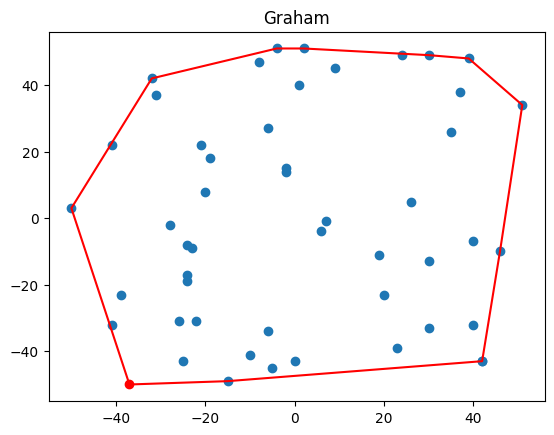

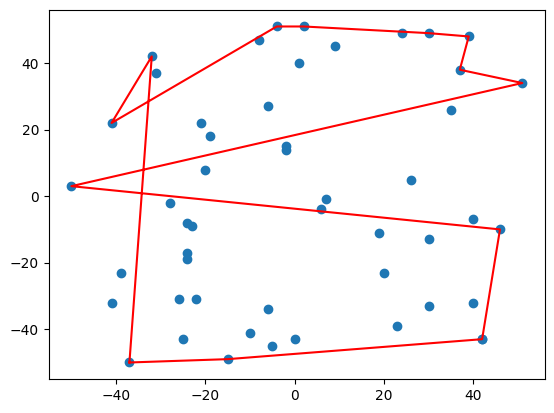

In [344]:
initialPoints = generateCoordinates(-50, -50, 50, 50, 50)
convexHull_GrahamScan.graham(initialPoints)
hull = quickHull(initialPoints)
hull_anticlockwise = sortByAngle(hull)
plot_points_and_line(initialPoints, hull_anticlockwise)